In [27]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

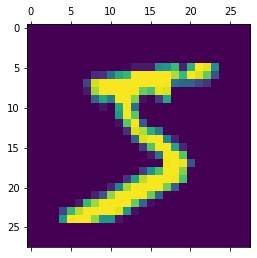

In [7]:
plt.matshow(X_train[0])

In [8]:
X_train.shape

(60000, 28, 28)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [20]:
X_test_flattened.shape

(10000, 784)

In [21]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4676 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2670 - accuracy: 0.9257


In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2686 - accuracy: 0.9254


[0.2685629725456238, 0.9254000186920166]

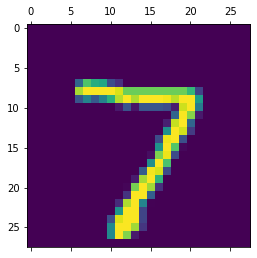

In [24]:
plt.matshow(X_test[0])

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.9728588e-02, 3.3028067e-07, 4.9041539e-02, 9.6005577e-01,
       1.6128519e-03, 1.3386199e-01, 1.4591245e-06, 9.9977088e-01,
       7.9269774e-02, 6.3838160e-01], dtype=float32)

In [28]:
np.argmax(y_predicted[0])

7

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   9,    9,  919,   20,    6,    3,   12,   10,   39,    5],
       [   4,    0,   15,  936,    0,   16,    2,   10,   19,    8],
       [   2,    1,    2,    2,  903,    0,   11,    4,    9,   48],
       [  11,    1,    2,   44,    8,  764,   17,    7,   30,    8],
       [  13,    3,    6,    1,    7,   10,  914,    2,    2,    0],
       [   2,    5,   20,    8,    5,    0,    0,  950,    2,   36],
       [   8,    7,    7,   31,    9,   27,    9,    9,  858,    9],
       [  11,    7,    1,   11,   18,    6,    0,   16,    5,  934]])>

Text(105.0, 0.5, 'Truth')

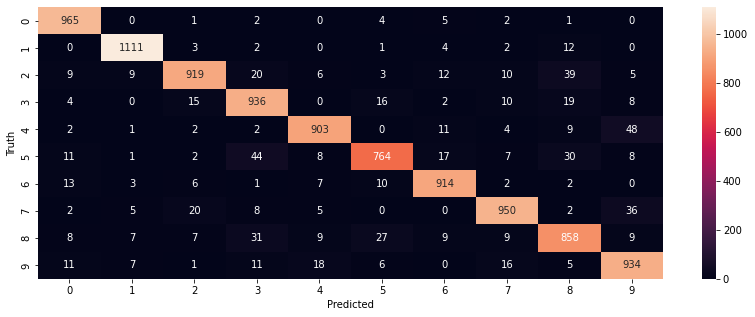

In [35]:
import seaborn as sn
plt.figure(figsize = (14,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2797 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1247 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0668 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9837


In [37]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9743


[0.08277453482151031, 0.9743000268936157]

313/313 [==============================] - 1s 2ms/step


Text(105.0, 0.5, 'Truth')

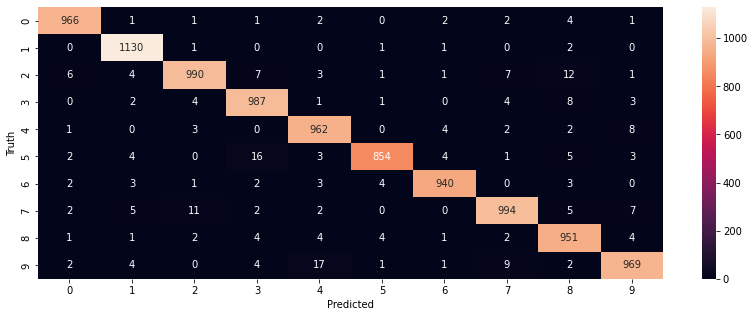

In [38]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (14,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2656 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1175 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0829 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0631 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0491 - accuracy: 0.9849
